In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
df_original = pd.read_csv('../dataset/basic_cleaned.csv')
df = df_original.copy()

In [3]:
df.shape

(1927085, 40)

In [4]:
df.columns

Index(['Unnamed: 0', 'proto', 'proto_number', 'saddr', 'sport', 'daddr',
       'dport', 'pkts', 'bytes', 'state', 'dur', 'average_dur', 'stddev_dur',
       'total_dur', 'min_dur', 'max_dur', 'spkts', 'dpkts', 'sbytes', 'dbytes',
       'rate', 'srate', 'drate', 'TnBPSrcIP', 'TnBPDstIP', 'TnP_PSrcIP',
       'TnP_PDstIP', 'TnP_PerProto', 'TnP_Per_Dport', 'AR_P_Proto_P_SrcIP',
       'AR_P_Proto_P_DstIP', 'N_IN_Conn_P_DstIP', 'N_IN_Conn_P_SrcIP',
       'AR_P_Proto_P_Sport', 'AR_P_Proto_P_Dport',
       'Pkts_P_State_P_Protocol_P_DestIP', 'Pkts_P_State_P_Protocol_P_SrcIP',
       'attack', 'category', 'subcategory'],
      dtype='object')

In [5]:
df.drop(['Unnamed: 0'],axis=1,inplace=True)

In [6]:
df_attacked = df[ (df['category'] =='DDoS') ]

In [7]:
df_normal = df[ (df['category'] =='normal') ]

## 1.What are the different type of protocols available? 

In [8]:
df.proto.unique()

array(['tcp', 'arp', 'udp', 'ipv6-icmp'], dtype=object)

In [9]:
df.proto.value_counts()

tcp          978397
udp          948598
arp              82
ipv6-icmp         8
Name: proto, dtype: int64

#### We have the majority of the data in dataset that consist of TCP and UDP protocols. There are very few samples of ARP and ICMP protocol.

## 2.Who are the top bots initiating the DDoS attacks?

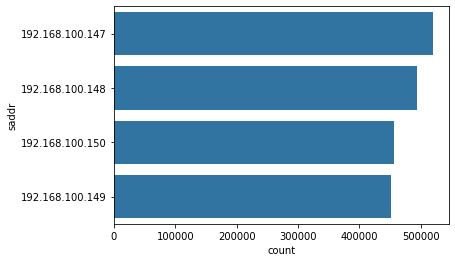

In [19]:
base_color = sb.color_palette()[0]
bot_order = df_attacked['saddr'].value_counts()[:4].index
sb.countplot(data = df_attacked, y = 'saddr', color = base_color, order = bot_order)

#### From this graph we can understand that 192.168.100.147 has sent out the most number of attack packets in our system. 

## 3.Which IP's were at destination? 

In [11]:
df.daddr.value_counts().iloc[:4]

192.168.100.3      1923162
192.168.100.147       1336
192.168.100.150       1313
192.168.100.149        579
Name: daddr, dtype: int64

#### We can see that the most number of attcks were received on our device with IP 192.168.100.3

## 4. Top ports from which attacks were initiated and received?

In [13]:
df_attacked.sport.value_counts()

 80       3485
-1          35
 54168      31
 42038      31
 41722      31
          ... 
 26833      27
 26820      27
 26817      27
 2152       27
 26804      27
Name: sport, Length: 65537, dtype: int64

In [14]:
df_attacked.dport.value_counts()

 80       1923117
-1             35
 6451           2
 6394           2
 6457           2
           ...   
 40424          1
 6648           1
 29173          1
 39400          1
 8196           1
Name: dport, Length: 3409, dtype: int64

#### We can see that highest number that is almost the entire dataset has the devices being attacked through port 80. We know that this is the HTTP port and is the most open port available in devices. It is also the port through which the highest number of attacks were initiated.

## 5.Describe the statistics of attack packet count in transaction

In [18]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)
df_attacked.pkts.describe()

count   1926608.00000
mean          7.33000
std           3.71533
min           1.00000
25%           5.00000
50%           7.00000
75%          10.00000
max          20.00000
Name: pkts, dtype: float64

(-1.1011026185317137,
 1.1161152461757873,
 -1.1003228616923768,
 1.1168950030151241)

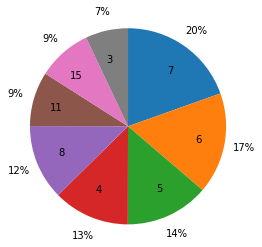

In [45]:
sorted_counts = df['pkts'].value_counts()[:8]
plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90, autopct='%1.0f%%', pctdistance=1.2, labeldistance=0.7
        ,counterclock = False);
plt.axis('square')



#### Here we have the total count of packets sent from bot to the devices.
#### The mean number packets send from bots is around 7-8. The maximum number sent is 20 and minimum being 1.
#### From the above statistics we can find that upto 75% of the packets send were more than 5 in number . This makes understand that most of the attcked packets has packet number in transaction more than 5.
#### 20% of attack data has packet count of 7 in transaction followed by 6 for 17%.